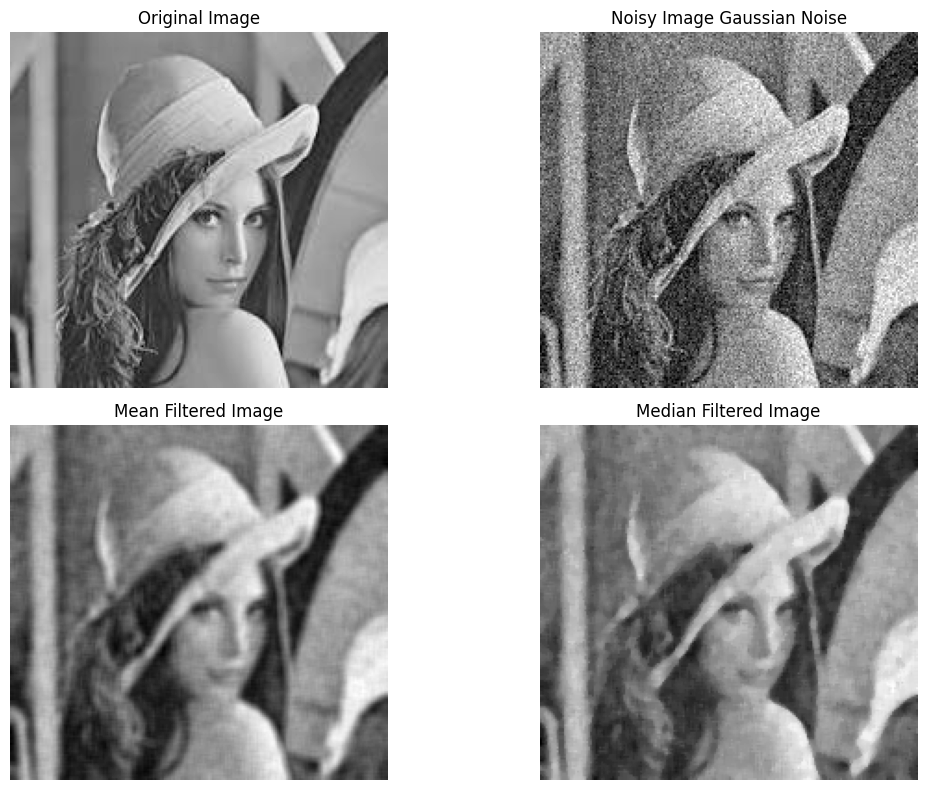

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image =cv2.imread('/content/drive/MyDrive/IP/lena.jfif',cv2.IMREAD_GRAYSCALE)

noise_sigma=25
noise=np.random.normal(0,noise_sigma,image.shape)
noisy_image=np.clip(image+noise,0,255).astype('uint8')
#apply mean filter
mean_filtered_image=cv2.blur(noisy_image,(5,5))
#apply median filter
median_filtered_image=cv2.medianBlur(noisy_image,5)

#Display the Images
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(noisy_image,cmap='gray')
plt.title('Noisy Image Gaussian Noise')
plt.axis('off')

#Mean Filtered Image
plt.subplot(2,2,3)
plt.imshow(mean_filtered_image,cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')
#Median Filtered Image
plt.subplot(2,2,4)
plt.imshow(median_filtered_image,cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

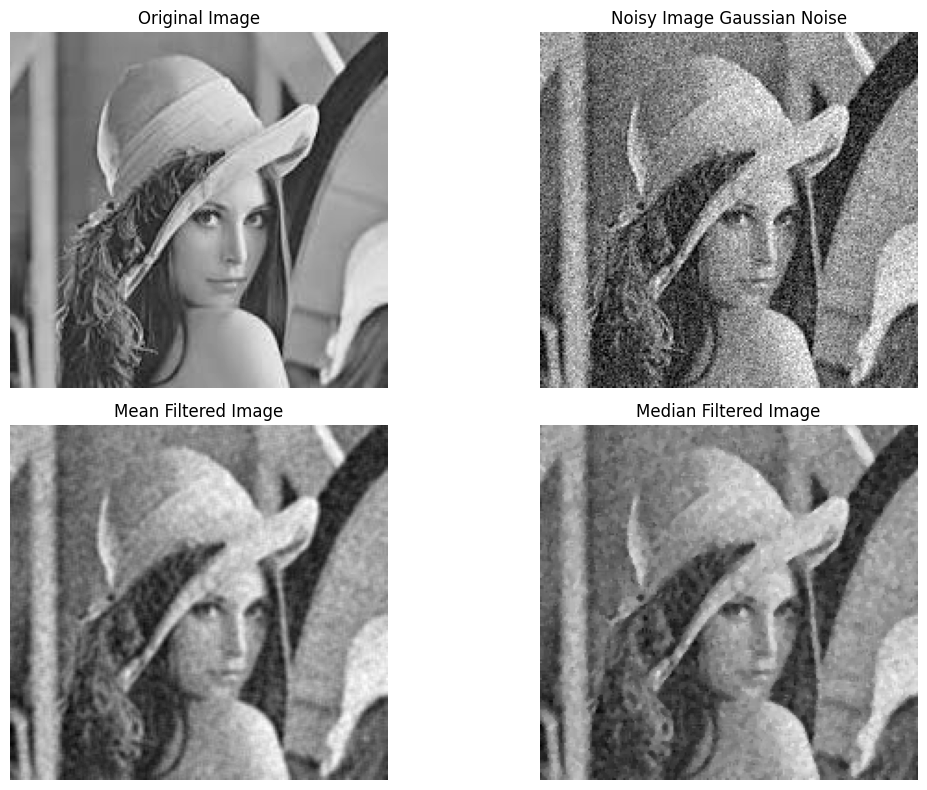

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image =cv2.imread('/content/drive/MyDrive/IP/lena.jfif',cv2.IMREAD_GRAYSCALE)

noise_sigma=25
noise=np.random.normal(0,noise_sigma,image.shape)
noisy_image=np.clip(image+noise,0,255).astype(np.uint8)
#apply mean filter
mean_filtered_image=cv2.blur(noisy_image,(3,3))
#apply median filter
median_filtered_image=cv2.medianBlur(noisy_image,3)

#Display the Images
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(noisy_image,cmap='gray')
plt.title('Noisy Image Gaussian Noise')
plt.axis('off')

#Mean Filtered Image
plt.subplot(2,2,3)
plt.imshow(mean_filtered_image,cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')
#Median Filtered Image
plt.subplot(2,2,4)
plt.imshow(median_filtered_image,cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

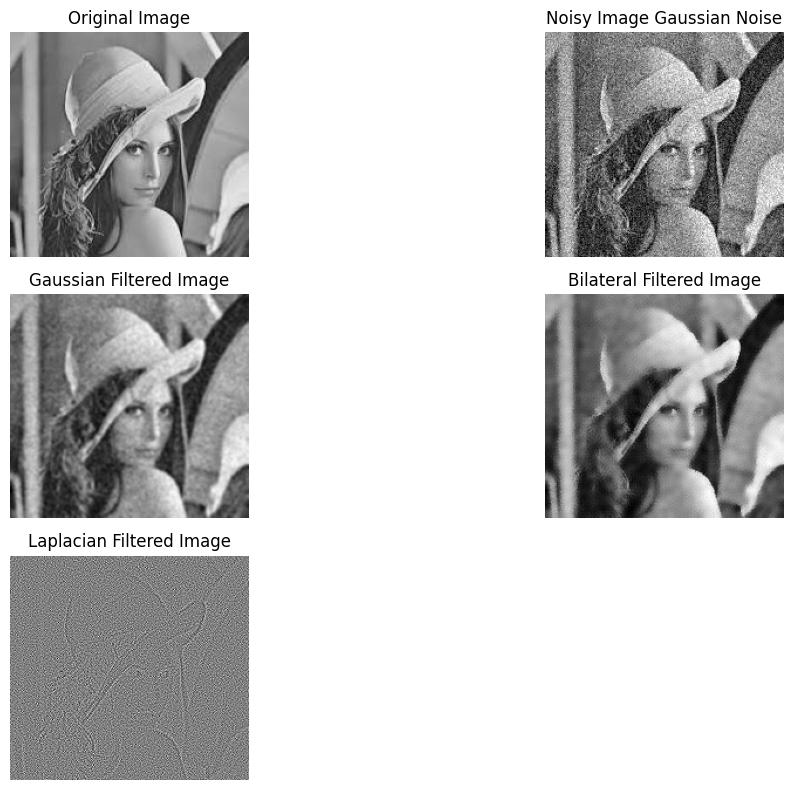

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image =cv2.imread('/content/drive/MyDrive/IP/lena.jfif',cv2.IMREAD_GRAYSCALE)

noise_sigma=25
noise=np.random.normal(0,noise_sigma,image.shape)
noisy_image=np.clip(image+noise,0,255).astype(np.uint8)

#gaussian Filter
gaussian_filtered_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
#Bilateral Filter
bilateral_filtered_image = cv2.bilateralFilter(noisy_image, 9, 75, 75)
#Laplacian Filter
laplacian_filtered_image = cv2.Laplacian(noisy_image, cv2.CV_64F)

#Display the Images
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(noisy_image,cmap='gray')
plt.title('Noisy Image Gaussian Noise')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(gaussian_filtered_image,cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(bilateral_filtered_image,cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(laplacian_filtered_image,cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')


plt.tight_layout()
plt.show()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter
image =cv2.imread('/content/drive/MyDrive/IP/lena.jfif',cv2.IMREAD_GRAYSCALE)

noise_sigma=25
noise=np.random.normal(0,noise_sigma,image.shape)
noisy_image=np.clip(image+noise,0,255).astype(np.uint8)
#apply mean filter
mean_filtered_image=cv2.blur(noisy_image,(5,5))
#apply median filter
median_filtered_image=cv2.medianBlur(noisy_image,5)
#apply gaussian filter
gaussian_filtered_image=cv2.GaussianBlur(noisy_image,(5,5),0)
#apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(noisy_image, 9, 75, 75)
# Minimum Filter
kernel = np.ones((5,5),np.uint8)
min_filtered_image = cv2.erode(noisy_image, kernel)
# Maximum Filter
max_filtered_image = cv2.dilate(noisy_image, kernel)
# Box Filter
box_filtered_image = cv2.boxFilter(noisy_image, -1, (5,5))
#Laplacian Filter
laplacian_filtered_image = cv2.Laplacian(noisy_image, cv2.CV_64F)
def harmonic_filter(window):
    return 1.0 / np.mean(1.0 / (window + 1e-10))

def geometric_filter(window):
    return np.exp(np.mean(np.log(window + 1e-10)))


def arithmetic_filter(window):
    return np.mean(window)

def contraharmonic_mean(window, Q):
  return np.sum(window**(Q+1)) / np.sum(window**Q)

# Define a placeholder for adaptive median filter
def adaptive_median_filter(image, size=5):
    return cv2.medianBlur(image, size)

# Apply filters using generic_filter from scipy
def apply_filter(filter_func, image, size=5):
    return generic_filter(image, filter_func, size=(size, size), mode='reflect')

harmonic_filter_image = apply_filter(harmonic_filter, noisy_image, size=5)
arithmetic_filter_image = apply_filter(arithmetic_filter, noisy_image, size=5)
geometric_filter_image = apply_filter(geometric_filter, noisy_image, size=5)
Q = 1.5
contraharmonic_filtered_image = generic_filter(noisy_image, lambda window: contraharmonic_mean(window, Q), size=5)
def plot_histogram(image,title):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.hist(image.flatten(),256,[0,256],color='r')
    plt.title(f'{title} Histogram')
    plt.tight_layout()
    plt.show()

plot_histogram(image,'Original Image')
plot_histogram(noisy_image,'Noisy Image')
plot_histogram(mean_filtered_image,'Mean Filtered Image')
plot_histogram(median_filtered_image,'Median Filtered Image')
plot_histogram(gaussian_filtered_image,'Gaussian Filtered Image')
plot_histogram(bilateral_filtered_image,'Bilateral Filtered Image')
plot_histogram(min_filtered_image,'Minimum Filtered Image')
plot_histogram(max_filtered_image,'Maximum Filtered Image')
plot_histogram(box_filtered_image,'Box Filtered Image')
plot_histogram(laplacian_filtered_image,'Laplacian Filtered Image')
plot_histogram(harmonic_filter_image, 'Harmonic Filtered Image')
plot_histogram(arithmetic_filter_image, 'Arithmetic Filtered Image')
plot_histogram(geometric_filter_image, 'Geometric Filtered Image')
plot_histogram(contraharmonic_filtered_image, 'Contraharmonic Filtered Image')


AttributeError: 'NoneType' object has no attribute 'shape'